# Feature Engineering

The act of choosing, altering, and transforming raw data into features that may be utilised in supervised learning is known as feature engineering. It may be necessary to build and train better features in order for machine learning to perform well on new tasks. A "feature" is any measurable input that can be used in a predictive model, such as the colour of an object or the sound of someone's voice, as you may know. In simple terms, feature engineering is the process of transforming raw observations into desired characteristics through statistical or machine learning methods.

* **Feature Creation:** Feature creation entails the creation of new variables that will be most useful to our model. This could entail adding or eliminating features. 
* **Feature Transformation:** Essentially a function that converts features from one representation to the next. The idea is to plot and visualise data so that if something doesn't add up with the new features, we can reduce the number of features utilised, speed up training, or improve the accuracy of a model. (This was done in the EDA section,  we are super efficient!)
* **Benchmarking:** A Benchmark Model is the most user-friendly, dependable, clear, and interpretable model you can use to compare your own performance against. Running test datasets to see if your new machine learning model outperforms a recognised benchmark is a smart idea. These benchmarks are frequently used to compare the performance of various machine learning models such as neural networks and support vector machines, linear and non-linear classifiers, and techniques such as bagging and boosting.  We will be using LightGBM, Linear Regression, Quantile Regression and PCA to measure and benchmark performance. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sc_train_data = pd.read_parquet("eda_train_data.parquet")

In [3]:
sc_train_data.head()

encode__State_Factor_State_10  encode__State_Factor_State_11  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   

   encode__State_Factor_State_2  encode__State_Factor_State_4  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   encode__State_Factor_State_6  encode__State_Factor_State_8  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   encode__facility_type_Multifamily  encode__facility_type_Nursing_Home  \
0                                0.0                                 0.0   
1                                0.0                                 0.0   
2                                0.0                                 0.0   
3                                0.0                                 0.0   
4                                0.0                                 0.0   

   encode__facility_type_Religious_worship  encode__facility_type_commercial  \
0                                      0.0                               0.0   
1                                      0.0                               0.0   
2                                      0.0                               0.0   
3                                      0.0                               0.0   
4                                      0.0                               0.0   

   ...  scale__days_below_30F  scale__days_below_20F  scale__days_below_10F  \
0  ...              -1.795102              -1.221547              -0.698249   
1  ...              -1.795102              -1.221547              -0.698249   
2  ...              -1.795102              -1.221547              -0.698249   
3  ...              -1.795102              -1.221547              -0.698249   
4  ...              -1.795102              -1.221547              -0.698249   

   scale__days_below_0F  scale__days_above_80F  scale__days_above_90F  \
0             -0.306693              -2.789302              -1.436961   
1             -0.306693              -2.789302              -1.436961   
2             -0.306693              -2.789302              -1.436961   
3             -0.306693              -2.789302              -1.436961   
4             -0.306693              -2.789302              -1.436961   

   scale__days_above_100F  scale__days_above_110F  scale__days_with_fog  \
0               -0.151891                     0.0              0.250724   
1               -0.151891                     0.0             -3.294050   
2               -0.151891                     0.0             -3.294050   
3               -0.151891                     0.0             -3.294050   
4               -0.151891                     0.0              0.250724   

   scale__site_eui  
0         2.868835  
1        -0.972632  
2        -1.003866  
3        -0.593870  
4        -1.363392  

[5 rows x 44 columns]

In [4]:
cols = sc_train_data.columns.tolist()
cols

['encode__State_Factor_State_10',
 'encode__State_Factor_State_11',
 'encode__State_Factor_State_2',
 'encode__State_Factor_State_4',
 'encode__State_Factor_State_6',
 'encode__State_Factor_State_8',
 'encode__facility_type_Multifamily',
 'encode__facility_type_Nursing_Home',
 'encode__facility_type_Religious_worship',
 'encode__facility_type_commercial',
 'encode__facility_type_education',
 'encode__facility_type_food',
 'encode__facility_type_healthcare',
 'encode__facility_type_lodging',
 'encode__facility_type_office',
 'encode__facility_type_public_assembly',
 'encode__facility_type_public_safety',
 'encode__facility_type_retail',
 'encode__facility_type_warehouse',
 'scale__Year_Factor',
 'scale__building_class',
 'scale__age',
 'scale__Q1',
 'scale__Q2',
 'scale__Q3',
 'scale__Q4',
 'scale__floor_area',
 'scale__energy_star_rating',
 'scale__ELEVATION',
 'scale__cooling_degree_days',
 'scale__heating_degree_days',
 'scale__precipitation_inches',
 'scale__snowfall_inches',
 'scal

## Variance Inflation Factor(VIF)

In a multivariate regression model, multicollinearity occurs when two or more independent variables have a significant correlation between them. **Multicollinearity is a problem because it undermines the statistical significance of an independent variable.** We may have trouble discriminating between individual influences on the dependent variable when some traits are highly associated. Various strategies can be used to detect multicollinearity, one of which is the Variance Inflation Factor (VIF).

We select each feature and regress it against all other features using the VIF approach. The factor is calculated as follows for each regression:

`VIF = 1/1-R^2`

As we can see from the calculation, the higher the R-squared value, the higher the VIF. As a result, a higher VIF indicates a higher association. This corresponds to the fact that a higher R-squared value indicates greater collinearity.

* There is no association between a given explanatory variable and any other explanatory variables in the model if the value is 1.
* A number between 1 and 5 shows that there is substantial correlation between a specific explanatory variable and other explanatory variables in the model, but it is usually not severe enough to warrant attention.
* A score of more than 5 indicates that a specific explanatory variable and other explanatory variables in the model have a potentially severe connection. The coefficient estimates and p-values in the regression output are most likely erroneous in this circumstance.

Read more about VIF [here.](https://www.statisticshowto.com/variance-inflation-factor/)

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# select what columns (if not all the dataset)
X = sc_train_data[cols]
  
# create a VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


                                    feature          VIF
0             encode__State_Factor_State_10     1.081087
1             encode__State_Factor_State_11    21.248470
2              encode__State_Factor_State_2    20.191011
3              encode__State_Factor_State_4    34.432403
4              encode__State_Factor_State_6   202.193621
5              encode__State_Factor_State_8    16.595570
6         encode__facility_type_Multifamily   175.458180
7        encode__facility_type_Nursing_Home     2.972970
8   encode__facility_type_Religious_worship     2.027636
9          encode__facility_type_commercial     9.430164
10          encode__facility_type_education    14.085373
11               encode__facility_type_food     2.592734
12         encode__facility_type_healthcare     2.653669
13            encode__facility_type_lodging     8.230500
14             encode__facility_type_office    34.621366
15    encode__facility_type_public_assembly     2.701776
16      encode__facility_type_p

In [6]:
vif_data.sort_values("VIF")

feature          VIF
0             encode__State_Factor_State_10     1.081087
21                               scale__age     1.119811
26                        scale__floor_area     1.150025
27                scale__energy_star_rating     1.384848
43                          scale__site_eui     1.389547
16      encode__facility_type_public_safety     1.656215
42                     scale__days_with_fog     1.808579
8   encode__facility_type_Religious_worship     2.027636
11               encode__facility_type_food     2.592734
12         encode__facility_type_healthcare     2.653669
15    encode__facility_type_public_assembly     2.701776
7        encode__facility_type_Nursing_Home     2.972970
28                         scale__ELEVATION     3.501649
40                   scale__days_above_100F     3.653126
17             encode__facility_type_retail     4.594701
19                       scale__Year_Factor     6.005565
13            encode__facility_type_lodging     8.230500
18          encode__facility_type_warehouse     8.389573
9          encode__facility_type_commercial     9.430164
31              scale__precipitation_inches    12.566350
10          encode__facility_type_education    14.085373
37                     scale__days_below_0F    15.386410
5              encode__State_Factor_State_8    16.595570
2              encode__State_Factor_State_2    20.191011
1             encode__State_Factor_State_11    21.248470
39                    scale__days_above_90F    21.522821
32                   scale__snowfall_inches    26.859787
20                    scale__building_class    27.890234
33                  scale__snowdepth_inches    30.452722
3              encode__State_Factor_State_4    34.432403
14             encode__facility_type_office    34.621366
38                    scale__days_above_80F    38.216824
36                    scale__days_below_10F    44.885070
34                    scale__days_below_30F    58.940658
35                    scale__days_below_20F   106.128422
6         encode__facility_type_Multifamily   175.458180
4              encode__State_Factor_State_6   202.193621
23                                scale__Q2   259.245133
25                                scale__Q4   871.962652
24                                scale__Q3   978.034149
29               scale__cooling_degree_days  1311.628002
22                                scale__Q1  3218.009011
30               scale__heating_degree_days  5451.789840
41                   scale__days_above_110F          NaN

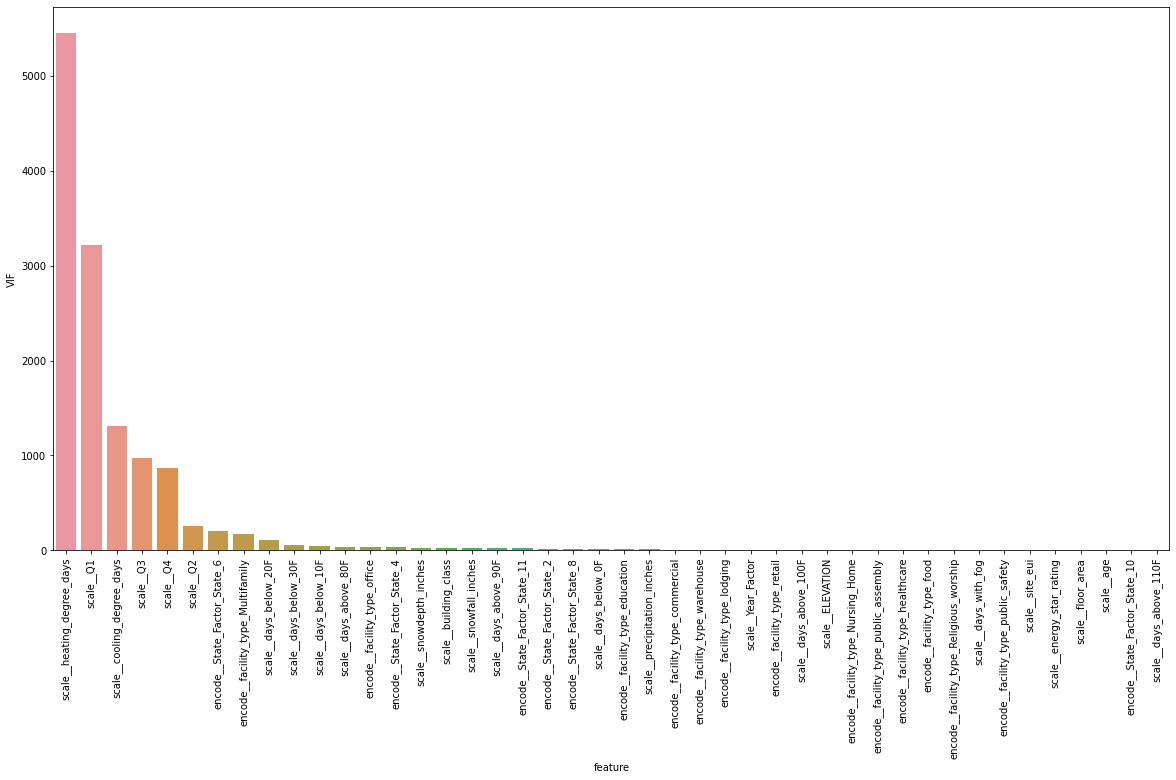

In [7]:
# visualise the results
plt.figure(figsize=(20,10))
ax = sns.barplot(x="feature", y="VIF", data=vif_data, 
                 order=vif_data.sort_values("VIF", ascending = False).feature)
plt.xticks(rotation="vertical")
plt.show()

As we can see there are some features which have a shocking high VIF - how should we deal with them?  Shall we drop the obscenely large ones? 

**NOTE models with extreme multicollinearity will occasionally produce invalid test statistics.** 

You can see this as a NaN value has been created for scale__days_above_110F - to over come this we can remove the extremely high VIF columns and re-test. 

## Feature Creation

Features created from insight drawn from EDA - re-run the VIF to check if the features are actually good for the model. 

Ideas so far: 
* Combine monthly average temps into seasonal columns. 

I have combined the monthly average temperatures and extracted the mean grouped into 4 quarters. 

Q1: Jan, Feb, March and so on. 

This was done in the EDA phasee however the code is below: 

In [8]:
# combine average month temps into quarters & take the mean
#train["Q1"] = train.loc[: , ["january_avg_temp", "february_avg_temp", "march_avg_temp"]].mean(axis = 1)
#train["Q2"] = train.loc[: , ["april_avg_temp", "may_avg_temp", "june_avg_temp"]].mean(axis = 1)
#train["Q3"] = train.loc[: , ["july_avg_temp", "august_avg_temp", "september_avg_temp"]].mean(axis = 1)
#train["Q4"] = train.loc[: , ["october_avg_temp", "november_avg_temp", "december_avg_temp"]].mean(axis = 1)

## Feature Selection & Importance

Feature selection is a technique for reducing the number of features in a model and thereby lowering its computational complexity. Feature selection is frequently effective in overcoming the problem of overfitting. It assists us in discovering the minimal collection of information required to accurately predict the target variable. If a feature adds little or no benefit to the predictive power, why add them and increase the complexity?

Examining the model's coefficients is perhaps the simplest technique to analyse feature importances. Both linear and logistic regression, for example, are based on an equation in which each input value is assigned a coefficient (importance).

Simply said, if a given coefficient is a significant (negative or positive) value, it has an impact on the forecast. If the coefficient is zero, on the other hand, it has no bearing on the forecast.

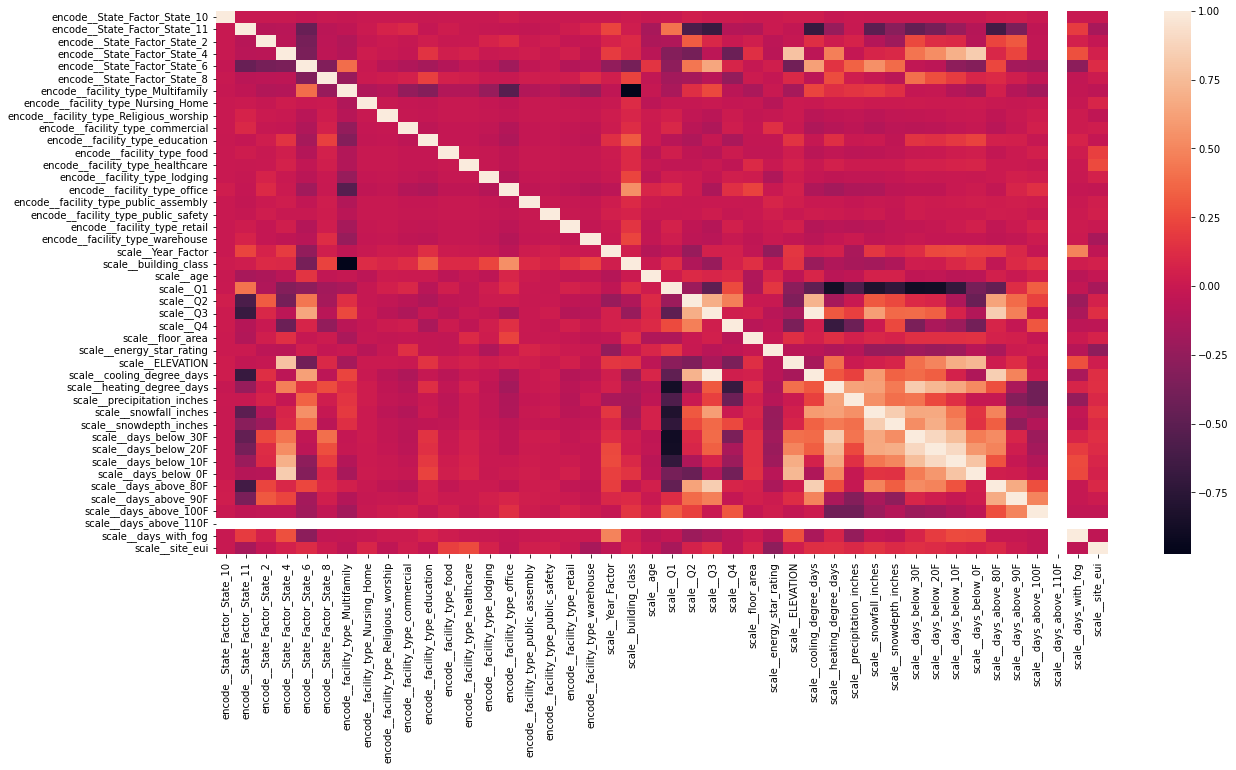

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(sc_train_data.corr())

### Prepare the Data

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = sc_train_data.drop("scale__site_eui", axis=1)
y = sc_train_data["scale__site_eui"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

### Random Forest

**Gini importance** (or mean decrease impurity), which is computed from the Random Forest structure. Let’s look how the Random Forest is constructed. It is a set of Decision Trees. Each Decision Tree is a set of internal nodes and leaves. In the internal node, the selected feature is used to make decision how to divide the data set into two separate sets with similars responses within. The features for internal nodes are selected with some criterion, which for classification tasks can be gini impurity or infomation gain, and for regression is variance reduction. We can measure how each feature decrease the impurity of the split (the feature with highest decrease is selected for internal node). For each feature we can collect how on average it decreases the impurity. The average over all trees in the forest is the measure of the feature importance. This method is available in scikit-learn implementation of the Random Forest (for both classifier and regressor). It is worth to mention, that in this method we should look at relative values of the computed importances. This biggest advantage of this method is a speed of computation - all needed values are computed during the Radom Forest training. The drawbacks of the method is to tendency to prefer (select as important) numerical features and categorical features with high cardinality. What is more, in the case of correlated features it can select one of the feature and neglect the importance of the second one (which can lead to wrong conclusions).

**Mean Decrease Accuracy** - is a method of computing the feature importance on permuted out-of-bag (OOB) samples based on mean decrease in the accuracy. This method is not implemented in the scikit-learn package. The very similar to this method is permutation based importance described below in this post.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [12]:
## Feature scaling
rf = RandomForestRegressor(n_estimators=100)


In [13]:
rf.fit(X_train, y_train) #Fit the Random Forest Regressor with 100 Decision Trees:

y_pred = rf.predict(X_test)
print('R2: %.3f, MAE: %.3f, MSE: %.3f' % (r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred)))

R2: 0.501, MAE: 0.366, MSE: 0.501


In [14]:
# To get the feature importances from the Random Forest model use the feature_importances_ attribute:

rf.feature_importances_

array([1.34264005e-06, 5.32783166e-03, 2.01413206e-03, 8.09933725e-04,
       4.35800570e-03, 2.46345508e-03, 1.00195269e-02, 4.96539619e-03,
       1.10363615e-03, 1.57943475e-02, 7.74723351e-03, 4.25406892e-02,
       6.08406592e-02, 5.21010799e-03, 1.21561080e-02, 2.83172685e-03,
       1.74792864e-03, 6.29227083e-03, 2.18455684e-02, 6.86276034e-03,
       1.07219996e-02, 1.59277021e-01, 9.33669981e-03, 9.90600421e-03,
       6.14660102e-03, 7.32184065e-03, 2.68214549e-01, 1.64981114e-01,
       3.57867972e-02, 4.76418307e-03, 3.13939617e-02, 9.85388352e-03,
       6.13351494e-03, 7.25749356e-03, 7.13342226e-03, 4.35920505e-03,
       3.98135339e-03, 3.08318531e-03, 9.08447097e-03, 5.36191978e-03,
       1.09366925e-03, 0.00000000e+00, 1.98744493e-02])

<BarContainer object of 43 artists>

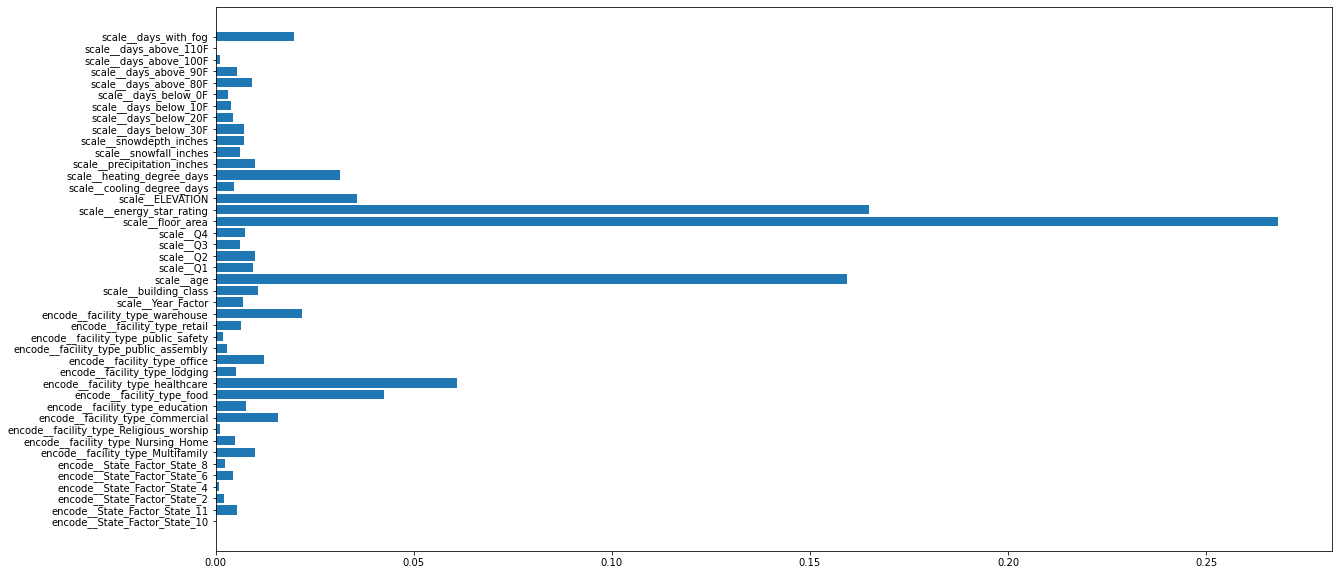

In [15]:
plt.figure(figsize=(20,10))
plt.barh(X_train.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

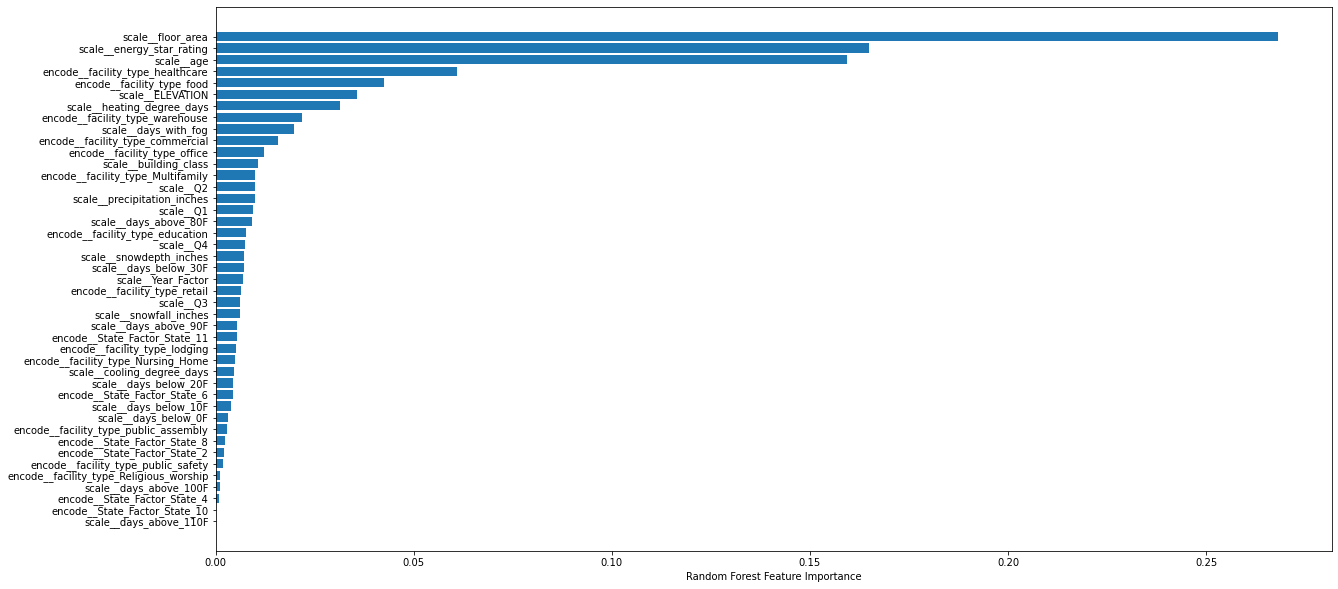

In [16]:
plt.figure(figsize=(20,10))

sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Permutation Based Feature Importance

The permutation based importance can be used to overcome drawbacks of default feature importance computed with mean impurity decrease. It is implemented in scikit-learn as permutation_importance method. As arguments it requires trained model (can be any model compatible with scikit-learn API) and validation (test data). This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

The permutation importance can be easily computed:

In [17]:
perm_importance = permutation_importance(rf, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

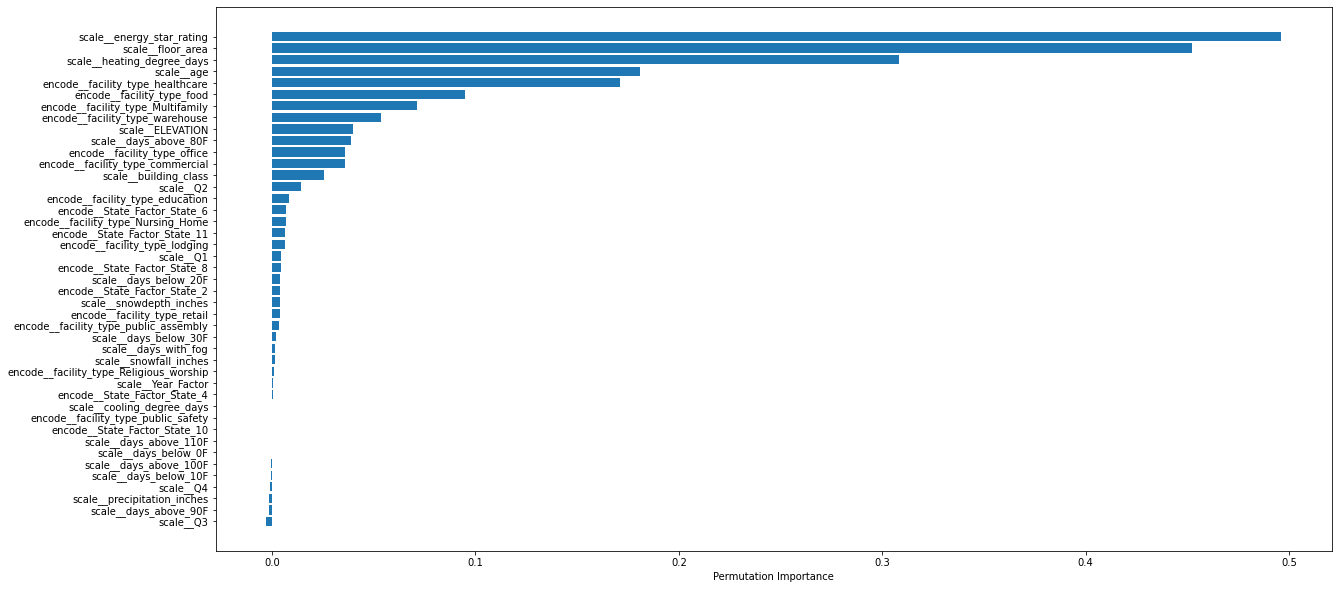

In [18]:
plt.figure(figsize=(20,10))
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

### Light Gradient Boosting Machine (LightGBM)
LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

Faster training speed and higher efficiency.
* Lower memory usage.
* Better accuracy.
* Support of parallel, distributed, and GPU learning.
* Capable of handling large-scale data.

Benefiting from these advantages, LightGBM is being widely-used in many winning solutions of machine learning competitions. 

Read more about LightGBM [here.](https://www.analyticssteps.com/blogs/what-light-gbm-algorithm-how-use-it) 

In [19]:
import lightgbm

gbm = lightgbm.LGBMRegressor()
gbm.fit(X_train, y_train)

LGBMRegressor()

In [20]:
y_pred = gbm.predict(X_test)
print('R2: %.3f, MAE: %.3f, MSE: %.3f' % (r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred)))

R2: 0.443, MAE: 0.387, MSE: 0.559


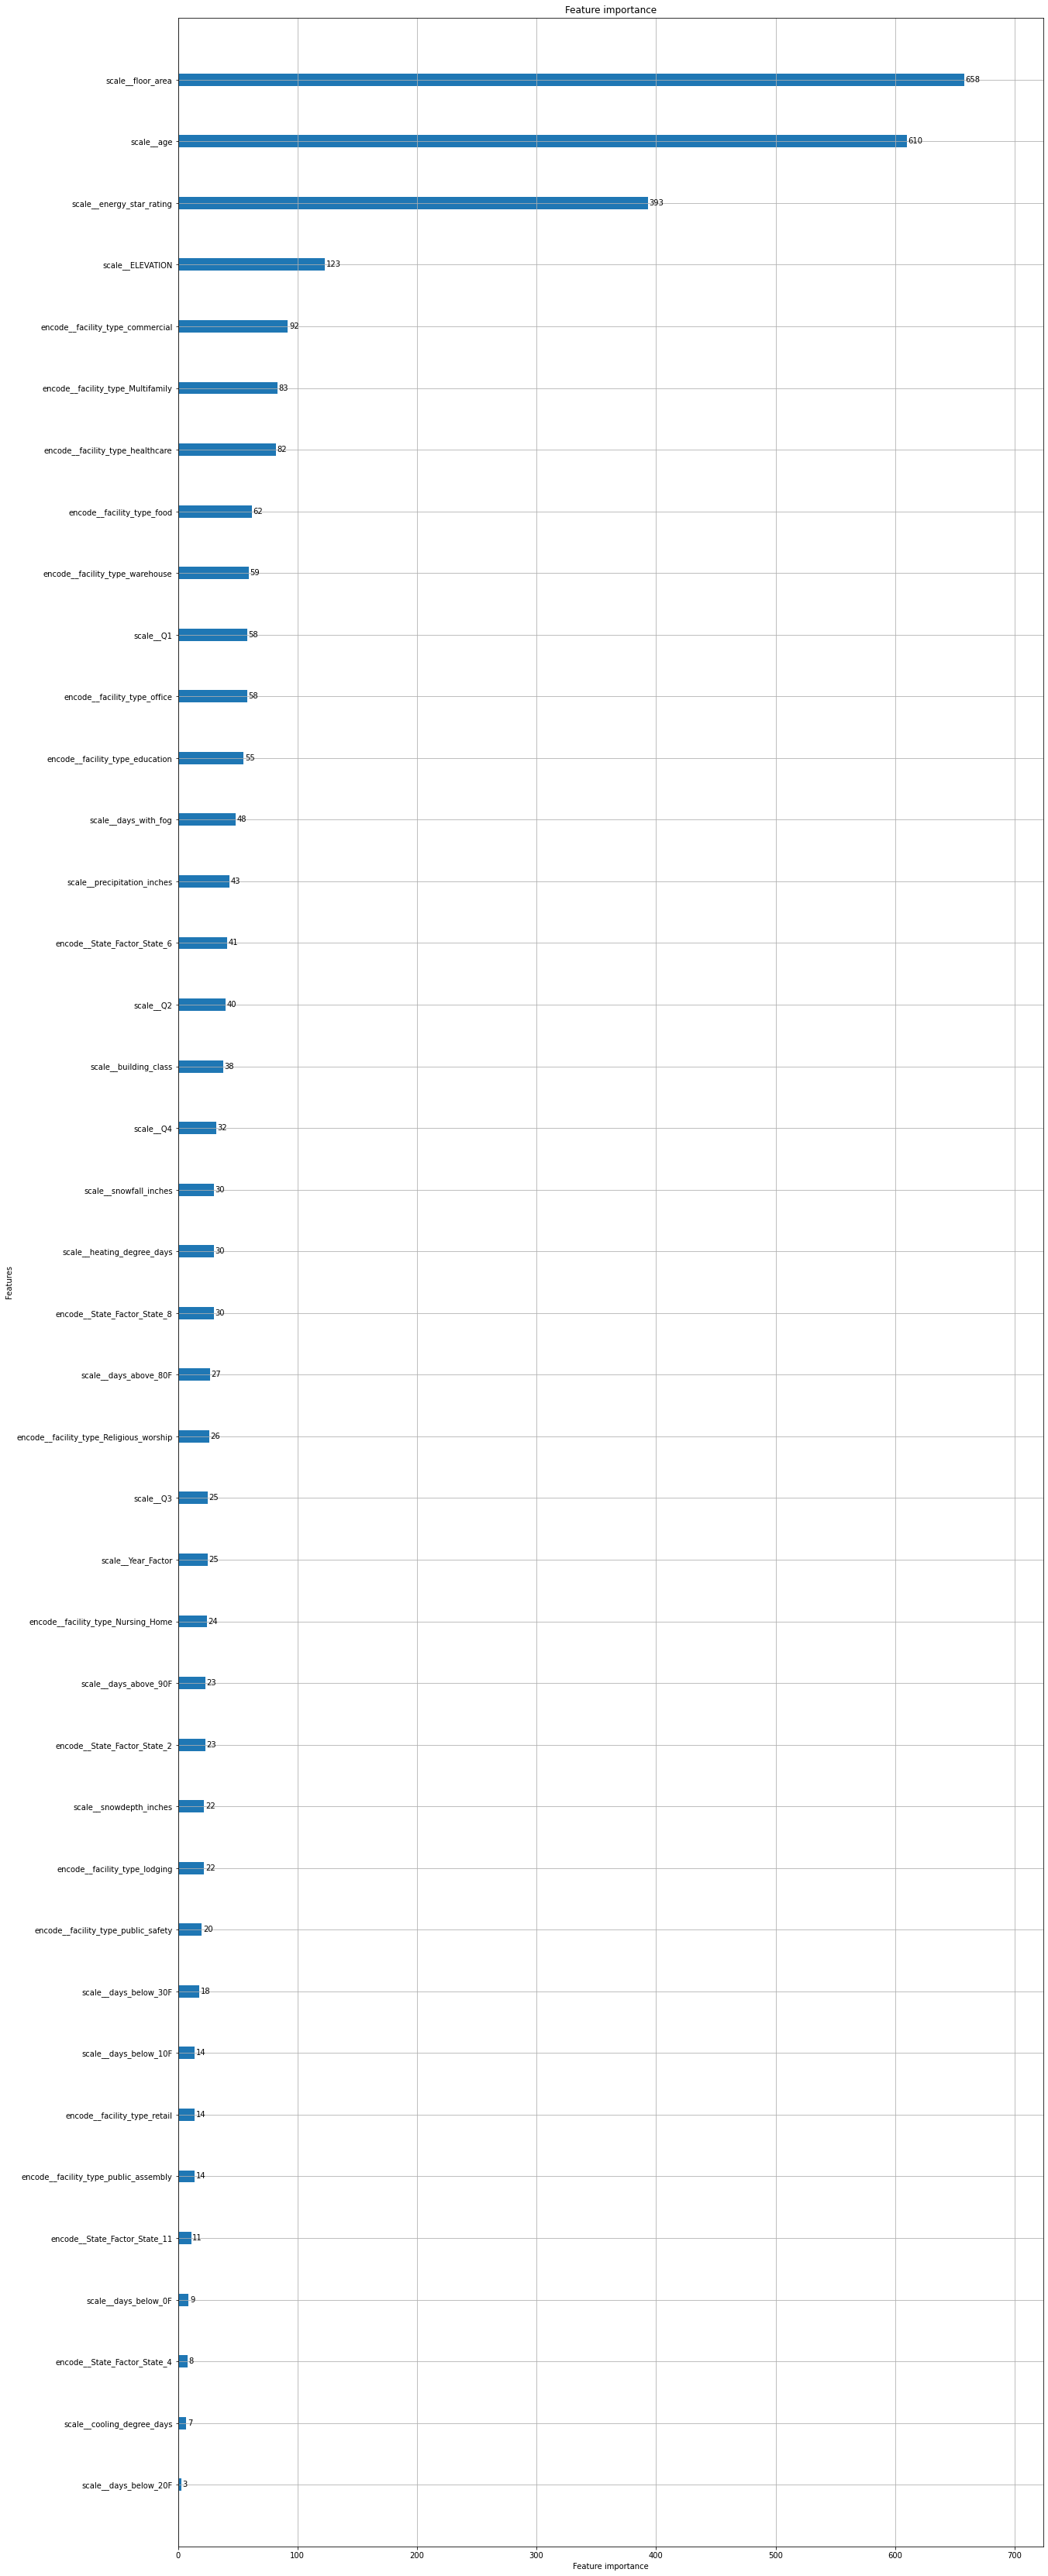

In [21]:
lightgbm.plot_importance(gbm, figsize = (20, 60))
plt.show()

### XGBoost

The ability of ensembles of decision tree methods like gradient boosting to automatically generate estimates of feature relevance from a trained predictive model is a benefit of employing them.

Gradient boosting has the advantage of making retrieving significance scores for each attribute very simple after the boosted trees have been generated.

In general, significance assigns a score to each feature that shows how useful or important it was in the creation of the model's enhanced decision trees. The higher the relative relevance of an attribute, the more it is used to make crucial judgments with decision trees.

This relevance is explicitly estimated for each property in the dataset, allowing attributes to be ordered and contrasted.

The amount that each attribute split point improves the performance measure, weighted by the number of observations the node is responsible for, is used to assess importance for a single decision tree.

The purity (Gini index) used to pick the split points or any more precise error function could be utilised as a performance measure.

The relevance of each attribute is then averaged across all of the decision trees in the model.

In [22]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

[12:17:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [23]:
y_pred = model.predict(X_test)
print('R2: %.3f, MAE: %.3f, MSE: %.3f' % (r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred)))

R2: 0.398, MAE: 0.407, MSE: 0.603


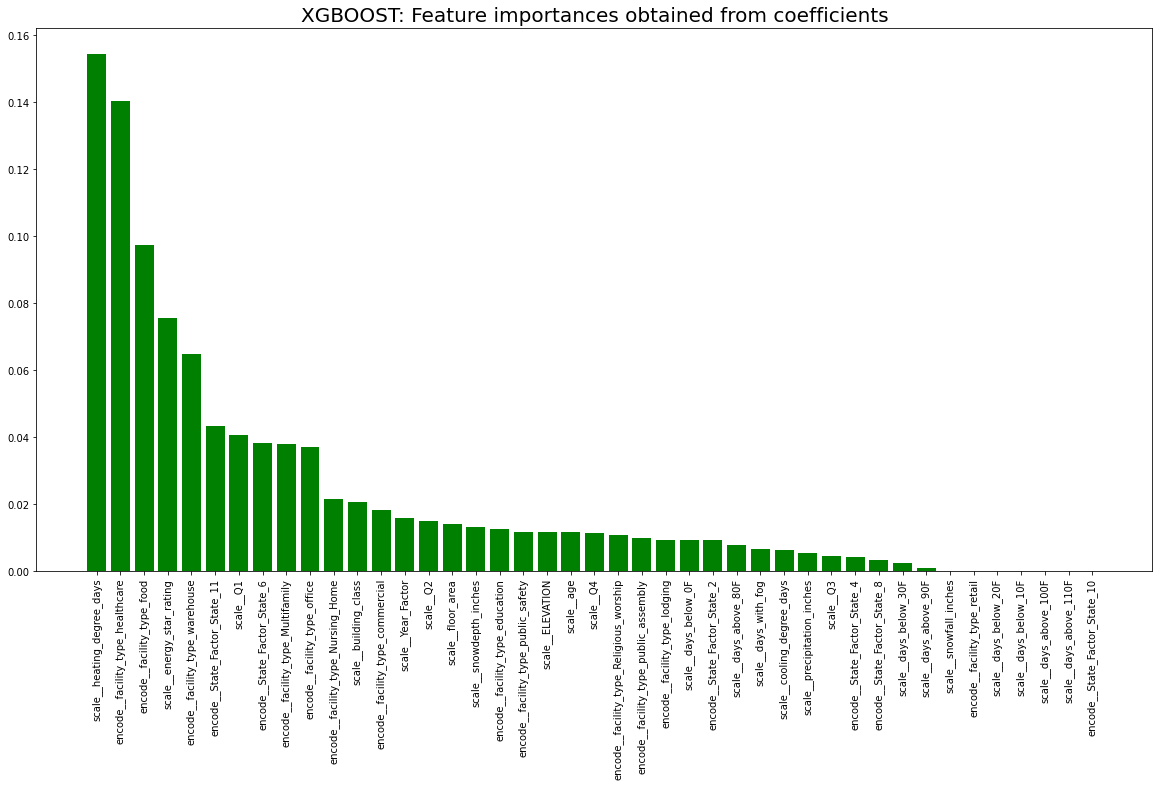

In [24]:
plt.figure(figsize=(20,10))
plt.bar(x=importances["Attribute"], height=importances["Importance"], color="Green")
plt.title("XGBOOST: Feature importances obtained from coefficients", size=20)
plt.xticks(rotation='vertical')
plt.show()

### Decision Tree Regressor

The CART technique is used to locate important features in a decision tree. To locate the significant characteristic, all algorithms based on Decision Tree adopt a similar technique.

In [25]:
from sklearn.tree import DecisionTreeRegressor

# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
importance=np.sort(importance)

In [26]:
y_pred = model.predict(X_test)
print('R2: %.3f, MAE: %.3f, MSE: %.3f' % (r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred)))

R2: 0.090, MAE: 0.465, MSE: 0.912


Feature: 0, Score: 0.0
Feature: 1, Score: 2.2360116096350802e-10
Feature: 2, Score: 0.0006334057506746124
Feature: 3, Score: 0.0013246449280463978
Feature: 4, Score: 0.001611092352856598
Feature: 5, Score: 0.0020816571024308487
Feature: 6, Score: 0.0022641743506739485
Feature: 7, Score: 0.0022824315883243837
Feature: 8, Score: 0.0024146439918823538
Feature: 9, Score: 0.0030158763762369286
Feature: 10, Score: 0.003598035559844609
Feature: 11, Score: 0.0035987605388664544
Feature: 12, Score: 0.003800422182406027
Feature: 13, Score: 0.0038710940014748253
Feature: 14, Score: 0.004140013907050854
Feature: 15, Score: 0.004420154838251866
Feature: 16, Score: 0.004710760138047807
Feature: 17, Score: 0.005061438849430958
Feature: 18, Score: 0.0051508610512198405
Feature: 19, Score: 0.005663134212150453
Feature: 20, Score: 0.0057931708491411864
Feature: 21, Score: 0.005801537543380874
Feature: 22, Score: 0.005815143286652168
Feature: 23, Score: 0.006161856050777404
Feature: 24, Score: 0.00660679

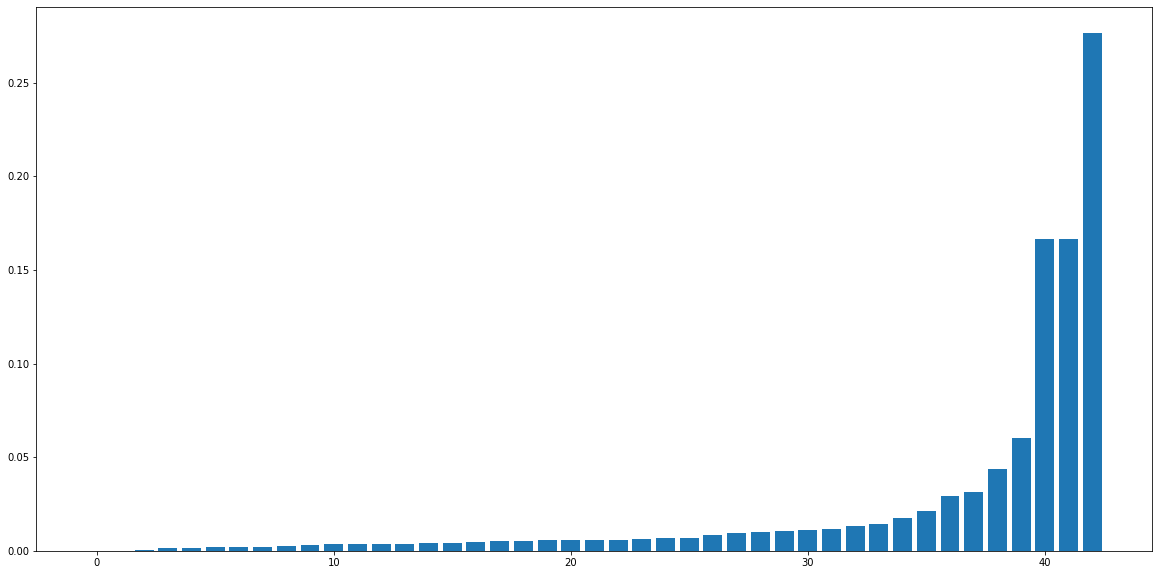

In [27]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}, Score: {}'.format(i,v))
# plot feature importance
plt.figure(figsize=(20,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Principle Component Analysis

Principal Component Analysis (PCA) is an excellent technique for reducing dimensionality and determining feature importance.

PCA, unlike the previous two algorithms, does not display you the most essential features right away. Instead, N primary components will be returned, where N is the number of original features.

Read more about PCA [here.](https://builtin.com/data-science/step-step-explanation-principal-component-analysis) 

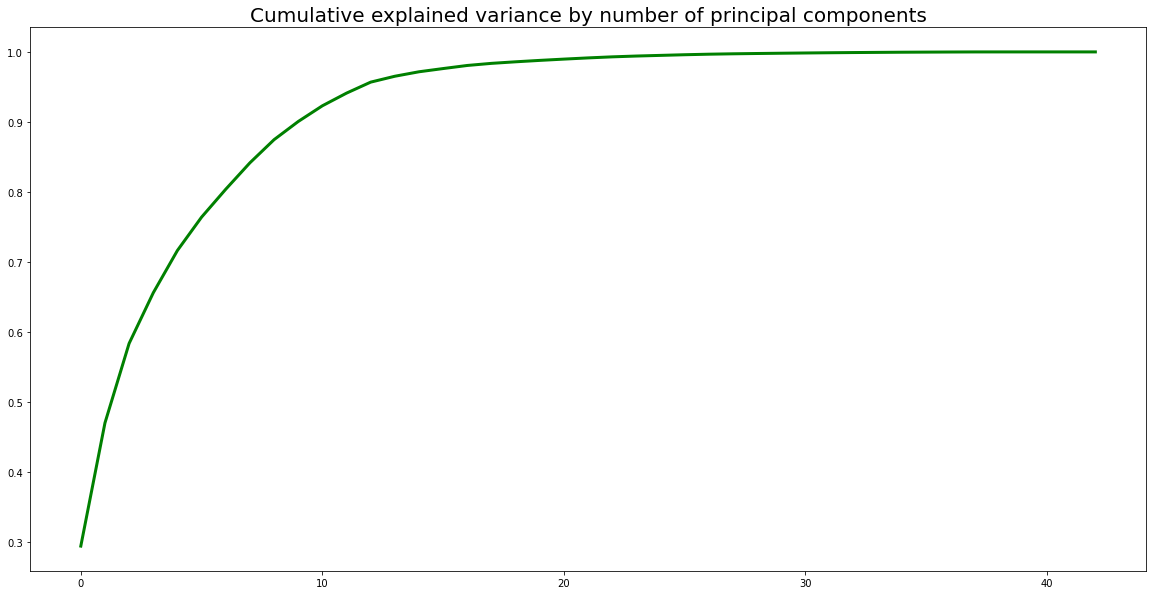

In [28]:
from sklearn.decomposition import PCA

pca = PCA().fit(X) # I haven't fit the training set on this instance. 
plt.figure(figsize=(20,10))
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color="Green")
plt.title("Cumulative explained variance by number of principal components", size=20)
plt.show()

Has anything changed?  

In [29]:
pca = PCA(n_components = 10)
pca.fit(X)

PCA(n_components=10)

In [30]:
pca.explained_variance_ratio_

array([0.2938387 , 0.17598622, 0.11360478, 0.07235058, 0.06049593,
       0.04763702, 0.03984717, 0.03773609, 0.03307731, 0.02595155])

In [31]:
x_pca = pca.transform(X)

In [32]:
print(x_pca.shape)

print(X.shape)

(73914, 10)
(73914, 43)


In [33]:
new_X = pd.DataFrame(x_pca)

new_X

0         1         2         3         4         5         6  \
0     -6.345342  3.297951 -0.291643 -2.430663  1.611182 -0.014188 -0.027305   
1     -6.500881  2.758494 -1.057510 -1.236567  3.380733  0.195592  0.889151   
2     -6.654647  2.721994 -1.138341 -0.740760  3.619964 -0.539910  1.273138   
3     -6.537731  2.800927 -1.076520 -1.261682  3.025616  0.219120  0.939811   
4     -6.600269  3.364969 -0.415672 -1.506214  1.790427 -0.331566  1.315531   
...         ...       ...       ...       ...       ...       ...       ...   
73909 -4.213617  3.662086 -0.489806 -1.420553 -0.419351  2.147241 -1.151651   
73910 -4.380969  3.117993 -1.355719 -0.598847 -0.977484 -1.308072 -0.414618   
73911 -1.288132  7.143452 -5.197133  0.395047  0.540562  0.413535 -3.321707   
73912 -1.258271  7.389742 -5.142604  0.550656  0.090481  2.211882 -1.825831   
73913 -1.181910  6.113668 -5.387108  0.216646 -1.261849  1.421528 -1.537737   

              7         8         9  
0     -1.381087  1.161452 -1.843000  
1     -1.840230  1.223305 -0.912604  
2     -0.866273  0.374969 -0.377970  
3     -2.512443  0.383959 -0.909631  
4     -0.142614 -1.090532 -0.836021  
...         ...       ...       ...  
73909 -1.699247  0.312706  0.105243  
73910  0.363309  0.679561  0.918236  
73911 -0.413810  0.207085  5.298455  
73912 -1.149438 -1.140146  5.455019  
73913 -1.927452  0.882330  4.353376  

[73914 rows x 10 columns]

As you can see, we have reduced our original data set from one with 69 features to a more simple model of principal components that has just 12 features.  We could take forward and build a model around the features and test the results.  

### RFE Regression for Random Forest

I have used the RFE on a Random Forest Regressor with 20 estimators.   Feel free to try different regression algorithms and play around with the parameters. 

I have modified Salmans work to reflect a regression model.  The StratifiedKFold method can only be used on classification tasks,  therefore I have amended this segment of the code and used a standard KFold.  

In [44]:
# evaluate RFE for Regression
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
model = RandomForestRegressor(n_estimators=20)

# create pipeline
# here we want only one final feature, we do this to produce a ranking
n_features_to_select = 1
rfe = RFE(model, n_features_to_select=n_features_to_select)
pipeline = make_pipeline(rfe, model)

# evaluate model
cv = KFold(n_splits=4, random_state=42, shuffle=True)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=cv, n_jobs=-1)
#print(n_scores)
# report performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
# print('R2: %.3f MAE: %.3f' % (r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred)))

MAE: -0.443 (0.004)


In [45]:
# evaluate RFE for Regression
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
min_features_to_select = 1  # Minimum number of features to consider
cv = KFold(n_splits=4, random_state=42, shuffle=True)
rfecv = RFECV(estimator = model, step = 1, cv = cv, scoring = 'neg_mean_absolute_error', min_features_to_select = min_features_to_select)
rfecv.fit(X_train, y_train)
# model = DecisionTreeRegressor()
# pipeline = make_pipeline(rfe, model)

# evaluate model
# cv = RepeatedStratifiedKFold(n_splits = 4, n_repeats = 3, random_state = 22)
# n_scores = cross_val_score(pipeline, X, y, scoring = 'neg_mean_absolute_error', cv=cv, n_jobs=-1)

# report performance
print("Optimal number of features : %d" % rfecv.n_features_)
# print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Optimal number of features : 2


In [46]:
# summarize the selection of the attributes
print(rfecv.support_)

[False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False  True False False False False False False False False False
 False False False False False False False]


In [47]:
# summarize the ranking of the attributes
fea_rank_ = pd.DataFrame({'cols':X.columns, 'fea_rank':rfecv.ranking_})
fea_rank_.loc[fea_rank_.fea_rank > 0].sort_values(by=['fea_rank'], ascending = True)

cols  fea_rank
21                               scale__age         1
26                        scale__floor_area         1
27                scale__energy_star_rating         2
30               scale__heating_degree_days         3
28                         scale__ELEVATION         4
12         encode__facility_type_healthcare         5
38                    scale__days_above_80F         6
11               encode__facility_type_food         7
42                     scale__days_with_fog         8
23                                scale__Q2         9
18          encode__facility_type_warehouse        10
31              scale__precipitation_inches        11
20                    scale__building_class        12
33                  scale__snowdepth_inches        13
9          encode__facility_type_commercial        14
22                                scale__Q1        15
24                                scale__Q3        16
10          encode__facility_type_education        17
34                    scale__days_below_30F        18
6         encode__facility_type_Multifamily        19
39                    scale__days_above_90F        20
25                                scale__Q4        21
14             encode__facility_type_office        22
32                   scale__snowfall_inches        23
19                       scale__Year_Factor        24
29               scale__cooling_degree_days        25
17             encode__facility_type_retail        26
13            encode__facility_type_lodging        27
1             encode__State_Factor_State_11        28
35                    scale__days_below_20F        29
7        encode__facility_type_Nursing_Home        30
4              encode__State_Factor_State_6        31
36                    scale__days_below_10F        32
2              encode__State_Factor_State_2        33
15    encode__facility_type_public_assembly        34
5              encode__State_Factor_State_8        35
37                     scale__days_below_0F        36
16      encode__facility_type_public_safety        37
40                   scale__days_above_100F        38
8   encode__facility_type_Religious_worship        39
3              encode__State_Factor_State_4        40
0             encode__State_Factor_State_10        41
41                   scale__days_above_110F        42

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


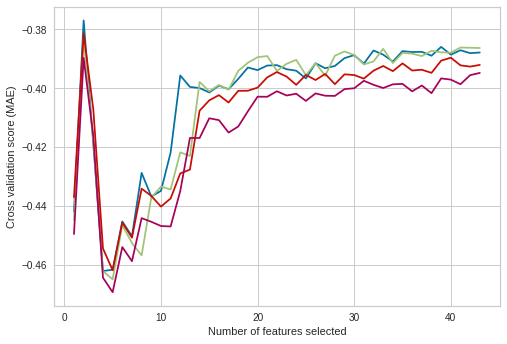

In [48]:
from IPython.core.pylabtools import figsize
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (MAE)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
# plt.legend()
plt.show()

In [ ]:
from yellowbrick.model_selection import RFECV

#Instantiate RFECV visualizer with a DecisionTreeRegressor
min_features_to_select = 1
cv = KFold(n_splits=4, random_state=42, shuffle=True)
rfecv = RFECV(estimator = model, step = 1, cv = cv, scoring = 'neg_mean_squared_error', min_features_to_select = min_features_to_select)
visualizer = rfecv

#print("Optimal number of features : %d" % rfecv.n_features_)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure
plt.show()

## Moving Forward

As you can see we had a varied number of performance metrics.   However,  I believe using the MAE metric would be preferentiable as there are a number of advantages in the context of our particular dataset.  

It is very resilient to anomalies within the data set,  and the value is easy to grasp as it uses the same units as the output variable. 

These are the model results achieved during feature engineering: 

**Results for RFE RandomForest:** MAE: -0.443 (0.005)

**Results for DecisionTree:** MAE: 0.464

**Results for Permutation:** MAE: 0.387

**Results for RandomForest (100 estimators):** MAE: 0.367

**Result for LightGM:** MAE: 0.387

**Result for XGBoost:** MAE: 0.407

Based on these results I would happy to take forward the insights from Permutation, RandomForest (100 estimators), LightGM and XGBoost. 
